# Employee Attrition Rate using Regression

## Context
We will be working with the dataset containing employee attrition rates, which is collected by Hackerearth and uploaded at Kaggle. We will use regression to predict attrition rates and see how successful is our model.

In [1]:
#Import the modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read the data from csv files
train = pd.read_csv("Train_Attrition.csv") 
test = pd.read_csv("Test_Attrition.csv")

In [3]:
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [4]:
train.shape

(7000, 24)

In [4]:
train.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [5]:
#Get the summary of the data
train.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [11]:
#Check the categorical data's uniqueness
train.select_dtypes(include=['object']).nunique()

Employee_ID                  7000
Gender                          2
Relationship_Status             2
Hometown                        5
Unit                           12
Decision_skill_possess          4
Compensation_and_Benefits       5
dtype: int64

In [12]:
#Check the null value
train.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

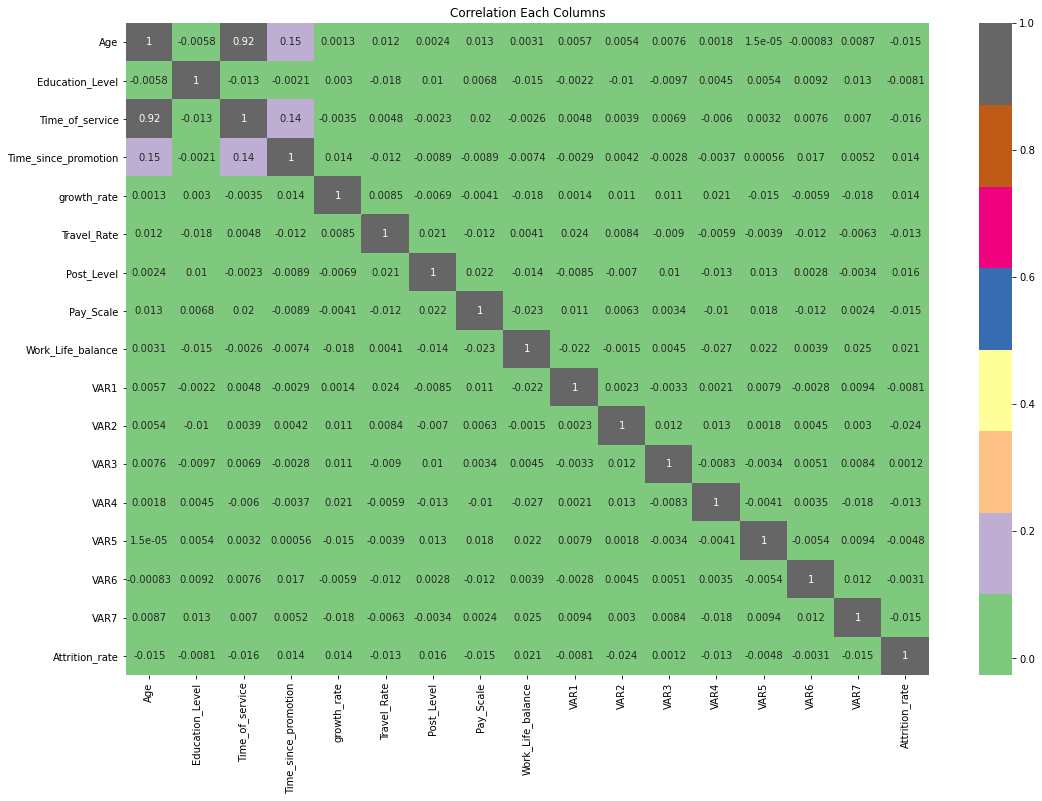

In [13]:
#Plot the correlation for each column

plt.figure(figsize=(18,12))
cor=train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Accent)
plt.title('Correlation Each Columns')
plt.show()


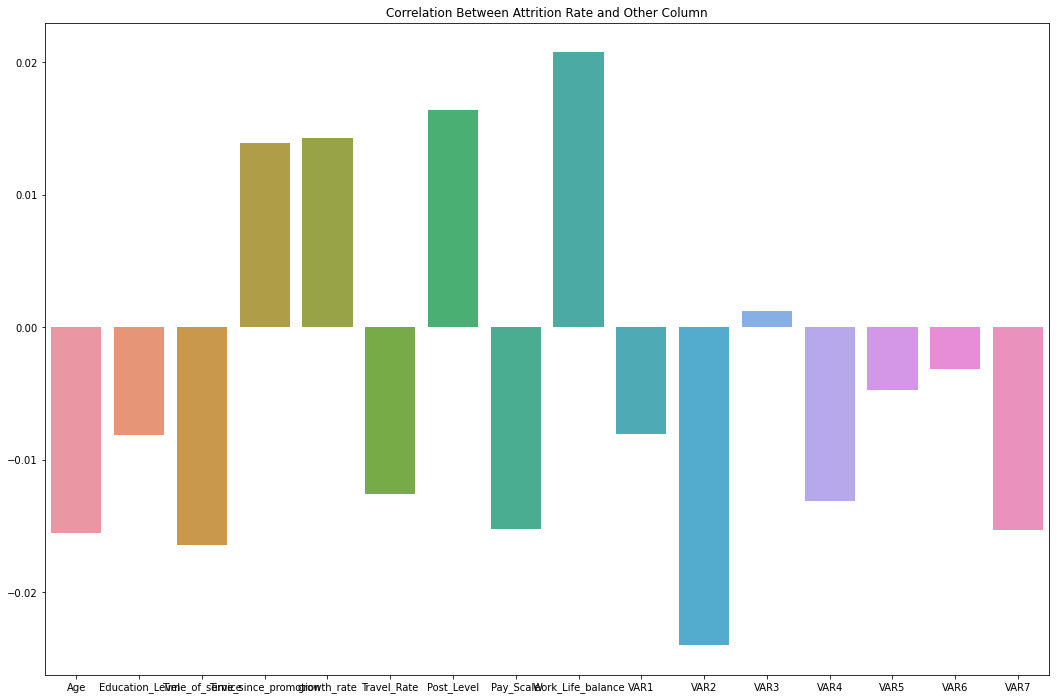

In [10]:
#Plot the correlation between attrition rate and other column 
plt.figure(figsize=(18,12))
corr_att = cor['Attrition_rate'].drop('Attrition_rate', axis=0)
sns.barplot(x=corr_att.index, y=corr_att.values)
plt.title('Correlation Between Attrition Rate and Other Column')
plt.show()

## Preparing the Model with just Drop Data

In [14]:
featured_data = train.dropna(axis=0)
featured_data.shape

(5353, 24)

In [15]:
y = featured_data.pop('Attrition_rate')
X = featured_data.drop(featured_data.select_dtypes("object").columns, axis=1)


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state=1,test_size=0.3)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error

### Simple Linear Model

In [15]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_valid)
mean_squared_error(y_valid, y_pred)


0.034249535099206495

In [16]:
mean_squared_error(y_valid, y_pred, squared=False)

0.1850662991989803

In [17]:
X_test = test.dropna(axis=0)
X_test = X_test[X_train.columns]
y_pred = model.predict(X_test)

In [18]:
c=[]
for i in range(len(y_pred)):
    c.append((y_pred[i].round(5)))

In [19]:
dfx = test.iloc[X_test.index,]

In [20]:
dfx.shape

(2321, 23)

In [21]:
dff = pd.DataFrame({'Employee_ID':dfx['Employee_ID'],'Attrition_rate':c})
dff.head(20)

,Employee_ID,Attrition_rate
0,EID_22713,0.19028
1,EID_9658,0.19181
2,EID_22203,0.17224
3,EID_7652,0.20463
4,EID_6516,0.19067
6,EID_21014,0.18480
7,EID_7693,0.17853
8,EID_13232,0.17926
9,EID_6515,0.18453
10,EID_13639,0.18974


## Compare with Different Model

In [19]:
models = [LinearRegression(), DecisionTreeRegressor(), SVR(), XGBRegressor()]
rmse=[]
mse=[]

for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    rmse.append(mean_squared_error(y_valid, y_pred))
    mse.append(mean_squared_error(y_valid, y_pred, squared=False))

In [21]:
result = pd.DataFrame({'Model':['Linear Regression', 'Decision Tree', 'Support Vector Machine', 'XGBoost'],'RMSE':rmse,'MSE':mse})
result

,Model,RMSE,MSE
0,Linear Regression,0.034250,0.185066
1,Decision Tree,0.076231,0.276100
2,Support Vector Machine,0.035556,0.188562
3,XGBoost,0.043628,0.208872


### Polynomial Regression Second Degree (Try other Model)

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)
y_pred = pol_reg.predict(poly_reg.fit_transform(X_valid))
mean_squared_error(y_valid, y_pred)

0.0360103096042054

In [31]:
mean_squared_error(y_valid, y_pred, squared=False)

0.18976382585784204

## Preparing the Model with One Hot Encoding

In [26]:
cleaned_data = featured_data.drop('Employee_ID', axis=1)
dummies = pd.get_dummies(cleaned_data, drop_first=True)
dummies

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,...,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,42.0,4,4.0,4,33,1,1,7.0,3.0,4,...,0,0,0,0,1,0,0,1,0,0
1,24.0,3,5.0,4,36,0,3,6.0,4.0,3,...,0,0,0,0,0,0,0,1,0,0
2,58.0,3,27.0,3,51,0,2,8.0,1.0,4,...,0,0,0,0,1,0,0,1,0,0
4,31.0,1,5.0,4,62,1,3,2.0,3.0,1,...,0,0,0,0,1,0,0,0,1,0
5,54.0,3,19.0,1,21,2,5,9.0,1.0,3,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,23.0,5,4.0,1,20,1,2,6.0,3.0,1,...,0,0,0,1,0,0,0,0,1,0
6996,44.0,1,16.0,2,59,0,2,4.0,3.0,2,...,1,0,0,0,0,0,0,0,1,0
6997,49.0,3,10.0,1,59,1,2,3.0,4.0,2,...,0,0,0,0,0,1,0,1,0,0
6998,47.0,3,24.0,1,21,1,5,8.0,2.0,4,...,0,1,0,1,0,0,0,0,0,0


In [27]:
X_train,X_valid,y_train,y_valid = train_test_split(dummies,y,random_state=1,test_size=0.3)

In [28]:
models = [LinearRegression(), DecisionTreeRegressor(), SVR(), XGBRegressor()]
rmse_OHE=[]
mse_OHE=[]

for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    rmse_OHE.append(mean_squared_error(y_valid, y_pred))
    mse_OHE.append(mean_squared_error(y_valid, y_pred, squared=False))

In [29]:
result = pd.DataFrame({'Model':['Linear Regression', 'Decision Tree', 'Support Vector Machine', 'XGBoost'],'RMSE':rmse_OHE,'MSE':mse_OHE})
result

,Model,RMSE,MSE
0,Linear Regression,0.034544,0.185860
1,Decision Tree,0.082995,0.288088
2,Support Vector Machine,0.035578,0.188621
3,XGBoost,0.042217,0.205468


## Compare the Model with Different Cleaning Data Method

In [30]:
result = pd.DataFrame({'Model':['Linear Regression', 'Decision Tree', 'Support Vector Machine', 'XGBoost'],'RMSE':rmse,'MSE':mse,'RMSE with OHE':rmse_OHE,'MSE with OHE':mse_OHE})
result

,Model,RMSE,MSE,RMSE with OHE,MSE with OHE
0,Linear Regression,0.034250,0.185066,0.034544,0.185860
1,Decision Tree,0.076231,0.276100,0.082995,0.288088
2,Support Vector Machine,0.035556,0.188562,0.035578,0.188621
3,XGBoost,0.043628,0.208872,0.042217,0.205468
